# Stroke Prediction

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
# Connect to gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read Data

In [3]:
# Import datasets
df = pd.read_csv("/content/drive/MyDrive/Bangkit Project/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Show size of data
df.shape

(5110, 12)

In [5]:
# Show data distribution of class variable
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

## Data Preprocessing

### Treat Missing Values

In [6]:
# Check missing values - all data
mv = df.isnull().sum() != 0
df.isnull().sum()[mv == True]

bmi    201
dtype: int64

In [7]:
# Check missing values - Class 1
mv1 = df[df['stroke'] == 1].isnull().sum() != 0
df[df['stroke'] == 1].isnull().sum()[mv1 == True]

bmi    40
dtype: int64

In [8]:
# Check missing values - Class 0
mv0 = df[df['stroke'] == 0].isnull().sum() != 0
df[df['stroke'] == 0].isnull().sum()[mv0 == True]

bmi    161
dtype: int64

Class 1 --> Replace with mean bmi based on class 1.\
Class 0 --> Remove missing values

In [9]:
# Remove missing values - Class 0
df0_clean = df[df['stroke'] == 0].dropna()

In [10]:
# Replace missing values with mean - Class 1
df1_clean = df[df['stroke'] == 1]
df1_clean['bmi'].replace([np.nan], df1_clean['bmi'].mean(), inplace=True)

<ipython-input-10-b481e355d133>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean['bmi'].replace([np.nan], df1_clean['bmi'].mean(), inplace=True)


In [11]:
df_clean = df0_clean.append(df1_clean)

<ipython-input-11-a450171eb499>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clean = df0_clean.append(df1_clean)


In [12]:
# Check missing values again
mv = df_clean.isnull().sum() != 0
df_clean.isnull().sum()[mv == True]

Series([], dtype: int64)

### Check Duplicate Values

In [13]:
df_duplicated = df_clean[df_clean.duplicated()]
df_duplicated

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Duplicate data not found in dataset.

## Feature Encoding

In [14]:
# Categorical columns
cat_cols = list(df_clean.select_dtypes(include='object'))
cat_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [15]:
# Create dummy df
df_final = pd.get_dummies(df_clean)
df_final.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,30669,3.0,0,0,95.12,18.0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
250,30468,58.0,1,0,87.96,39.2,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
251,16523,8.0,0,0,110.89,17.6,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
252,56543,70.0,0,0,69.04,35.9,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
253,46136,14.0,0,0,161.28,19.1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [16]:
# Drop columns
df_final.drop(["id", "gender_Other"], axis=1, inplace=True)

In [17]:
df_final.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

### Balancing Data

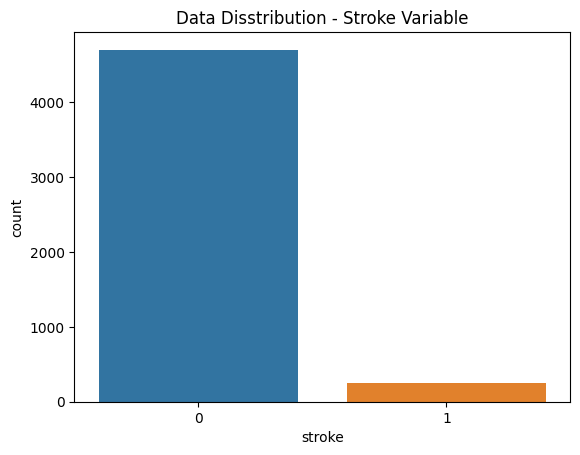

In [18]:
# Show data distribution - Class variable
sns.countplot(x='stroke', data=df_final)
plt.title("Data Disstribution - Stroke Variable")
plt.show()

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html

In [19]:
# Split data into X and y
y = np.array(df_final['stroke'])
X = df_final.drop('stroke', axis=1)
# Show data distribution
from collections import Counter
Counter(y)

Counter({0: 4700, 1: 249})

In [20]:
# Using ADASYN
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_blncd, y_blncd = adasyn.fit_resample(X, y)
Counter(y_blncd)

Counter({0: 4700, 1: 4743})

## Modelling

In [21]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_blncd, y_blncd, test_size=0.3)

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
ypred = rf.predict(X_test)
print("Accuracy Score :", accuracy_score(ypred, y_test))
print("F1-Score       :", f1_score(ypred, y_test))

Accuracy Score : 0.9717613836921991
F1-Score       : 0.9706959706959707


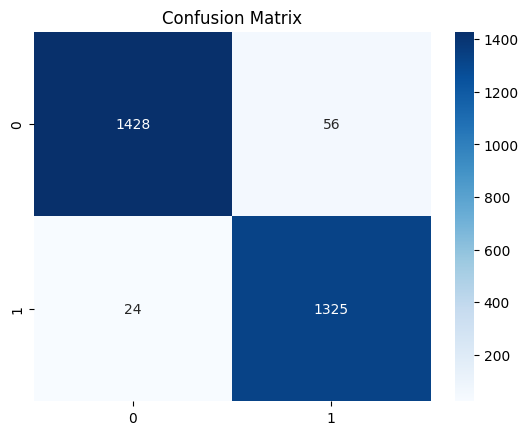

In [29]:
sns.heatmap(confusion_matrix(ypred, y_test), annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()